# Intro notebook

## Fetching data

In [150]:
# Python can quickly grab financial data
import pandas as pd
from pandas_datareader import DataReader as pdr
pd.options.display.float_format = '{:.2f}'.format

# 10-year Treasury Yield from FRED
y10 = pdr("DGS10", "fred", start="1929-12-01")


In [30]:
y10

DGS10
DATE             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
1962-01-08   4.03
...           ...
2022-10-18   4.01
2022-10-19   4.14
2022-10-20   4.24
2022-10-21   4.21
2022-10-24   4.25

[15865 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

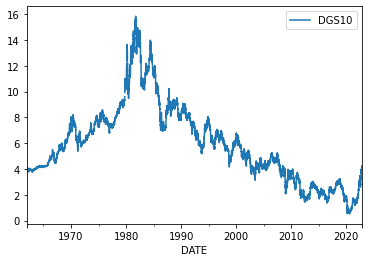

In [39]:
# A quick and dirty plot
y10.plot()

In [37]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=y10.index, y=y10.DGS10, mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [133]:
# Pull stock information
ticker = 'AAPL'
ret = pdr(ticker, "yahoo", start=2000)
ret

High     Low    Open   Close          Volume  Adj Close
Date                                                                 
2000-01-03   $1.00   $0.91   $0.94   $1.00 $535,796,800.00      $0.85
2000-01-04   $0.99   $0.90   $0.97   $0.92 $512,377,600.00      $0.78
2000-01-05   $0.99   $0.92   $0.93   $0.93 $778,321,600.00      $0.79
2000-01-06   $0.96   $0.85   $0.95   $0.85 $767,972,800.00      $0.72
2000-01-07   $0.90   $0.85   $0.86   $0.89 $460,734,400.00      $0.76
...            ...     ...     ...     ...             ...        ...
2022-10-20 $145.89 $142.65 $143.02 $143.39  $64,522,000.00    $143.39
2022-10-21 $147.85 $142.65 $142.87 $147.27  $86,464,700.00    $147.27
2022-10-24 $150.23 $146.00 $147.19 $149.45  $75,981,900.00    $149.45
2022-10-25 $152.49 $149.36 $150.09 $152.34  $74,373,600.00    $152.34
2022-10-26 $151.99 $148.88 $150.96 $149.18  $56,276,294.00    $149.18

[5742 rows x 6 columns]

In [134]:
# Keep just the last data adjusted close data point each month
ret = ret["Adj Close"].resample("M").last()
ret

Date
2000-01-31     $0.79
2000-02-29     $0.87
2000-03-31     $1.04
2000-04-30     $0.95
2000-05-31     $0.64
               ...  
2022-06-30   $136.53
2022-07-31   $162.28
2022-08-31   $157.22
2022-09-30   $138.20
2022-10-31   $149.18
Freq: M, Name: Adj Close, Length: 274, dtype: float64

In [135]:
# Calculate a return
ret = ret.pct_change()
ret

Date
2000-01-31      NaN
2000-02-29    $0.10
2000-03-31    $0.18
2000-04-30   $-0.09
2000-05-31   $-0.32
              ...  
2022-06-30   $-0.08
2022-07-31    $0.19
2022-08-31   $-0.03
2022-09-30   $-0.12
2022-10-31    $0.08
Freq: M, Name: Adj Close, Length: 274, dtype: float64

In [136]:
ret.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31'],
              dtype='datetime64[ns]', name='Date', length=274, freq='M')

In [137]:
ret.index = ret.index.to_period("M")
ret.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10'],
            dtype='period[M]', name='Date', length=274)

In [138]:
ret.name = "ret"
ret

Date
2000-01      NaN
2000-02    $0.10
2000-03    $0.18
2000-04   $-0.09
2000-05   $-0.32
           ...  
2022-06   $-0.08
2022-07    $0.19
2022-08   $-0.03
2022-09   $-0.12
2022-10    $0.08
Freq: M, Name: ret, Length: 274, dtype: float64

In [139]:
# Summary statistics
print(ret.mean())
print(ret.std())

0.02629347130371812
0.11397874806871462


<AxesSubplot:xlabel='Date'>

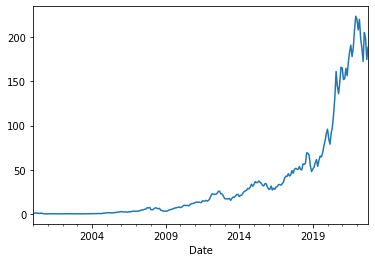

In [140]:
# Cumulative returns
(1+ret).cumprod().plot()

In [147]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=ret.index.to_timestamp("M"), y=(1+ret).cumprod(), mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [92]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = pdr(ticker, "yahoo", start=2000)
    ret = ret["Adj Close"].resample("M").last()
    ret = ret.pct_change()
    ret.index = ret.index.to_period("M")
    ret.name = ticker
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

In [93]:
df = pd.merge(left=ibm,right=aapl,how='inner',left_index=True,right_index=True)
df

IBM      AAPL
Date                       
2000-01       NaN       NaN
2000-02 -0.083669  0.104820
2000-03  0.152068  0.184842
2000-04 -0.058079 -0.086517
2000-05 -0.036395 -0.322922
...           ...       ...
2022-06  0.016926 -0.081430
2022-07 -0.073660  0.188634
2022-08 -0.005517 -0.031208
2022-09 -0.075049 -0.120977
2022-10  0.139214  0.078944

[274 rows x 2 columns]

In [94]:
df.corr()

IBM      AAPL
IBM   1.000000  0.434675
AAPL  0.434675  1.000000

Mean of  50.00% portfolio is:  1.58% (per month)
Mean of  75.00% portfolio is:  2.11% (per month)


<AxesSubplot:xlabel='Date'>

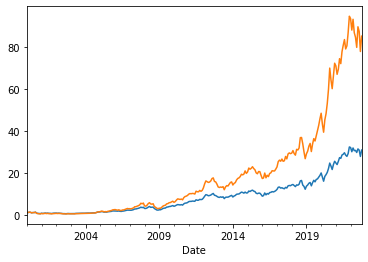

In [148]:
# How would different portfolios of AAPL and IBM have fared?

wgt = 0.5
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print('Mean of ' + f'{wgt: .2%}' + ' portfolio is: ' + f'{df.retp.mean(): .2%}' + ' (per month)')
df.cumretp.plot()


wgt = 0.75
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print('Mean of ' + f'{wgt: .2%}' + ' portfolio is: ' + f'{df.retp.mean(): .2%}' + ' (per month)')
df.cumretp.plot()


In [102]:
# Ken French data library at Dartmouth
# Some factors
ff3 = pdr('F-F_Research_Data_Factors','famafrench', start=1900)[0]/100

# Some industry portfolios
ff48 = pdr("48_Industry_Portfolios", "famafrench", start=1900)[0]/100



In [103]:
ff3

Mkt-RF     SMB     HML      RF
Date                                   
1926-07  0.0296 -0.0256 -0.0243  0.0022
1926-08  0.0264 -0.0117  0.0382  0.0025
1926-09  0.0036 -0.0140  0.0013  0.0023
1926-10 -0.0324 -0.0009  0.0070  0.0032
1926-11  0.0253 -0.0010 -0.0051  0.0031
...         ...     ...     ...     ...
2022-05 -0.0034 -0.0185  0.0841  0.0003
2022-06 -0.0843  0.0209 -0.0597  0.0006
2022-07  0.0957  0.0281 -0.0410  0.0008
2022-08 -0.0378  0.0139  0.0031  0.0019
2022-09 -0.0936 -0.0081  0.0005  0.0019

[1155 rows x 4 columns]

In [158]:
# What does the following represent?
mrp = ff3['Mkt-RF'].mean()*12
print(f'{mrp:.2%}')

7.97%


In [151]:
ff48

Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
Date                                                                            
1926-07   0.02   0.00  -1.00  -0.05   0.01   0.09   0.03   0.50  -0.00   0.08   
1926-08   0.02   0.03  -1.00   0.27   0.07   0.17  -0.01   0.43  -0.04  -0.03   
1926-09  -0.01   0.02  -1.00   0.04   0.01   0.08   0.06  -0.05   0.01  -0.01   
1926-10  -0.00  -0.04  -1.00  -0.03   0.01  -0.01  -0.05   0.05  -0.05   0.00   
1926-11   0.07   0.06  -1.00   0.07   0.05   0.00   0.02  -0.06  -0.01   0.02   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2022-05   0.07  -0.03  -0.00  -0.02   0.03  -0.01  -0.04  -0.07  -0.05  -0.06   
2022-06  -0.12  -0.02   0.00  -0.00  -0.12  -0.13  -0.11  -0.12  -0.03  -0.12   
2022-07   0.06   0.04   0.03   0.05   0.01   0.06   0.17   0.12   0.01   0.12   
2022-08   0.05  -0.00  -0.04  -0.02  -0.00  -0.06  -0.02  -0.05  -0.02  -0.06   
2022-09  -0.07  -0.08  -0.08  -0.05  -0.11  -0.15  -0.04  -0.13  -0.11  -0.17   

         ...  Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  RlEst  Fin    \
Date     ...                                                                  
1926-07  ...   0.08   0.02  -0.24   0.00   0.02   0.05  -0.01   0.03  -0.06   
1926-08  ...  -0.02   0.05   0.05  -0.01  -0.00   0.12   0.03   0.05   0.00   
1926-09  ...  -0.06   0.00  -0.08   0.00  -0.01  -0.02   0.01  -0.03  -0.05   
1926-10  ...  -0.05  -0.03  -0.15  -0.02  -0.04  -0.12  -0.04  -0.06  -0.01   
1926-11  ...   0.04   0.02   0.05   0.07   0.04  -0.03   0.04   0.02   0.05   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2022-05  ...  -0.05  -0.05   0.01  -0.06  -0.03   0.03   0.01  -0.02   0.04   
2022-06  ...  -0.08  -0.07  -0.06  -0.09  -0.09  -0.12  -0.02  -0.14  -0.10   
2022-07  ...   0.07   0.09   0.09   0.16   0.12   0.09   0.03   0.14   0.10   
2022-08  ...  -0.09  -0.01  -0.02  -0.03  -0.01  -0.03  -0.01  -0.06  -0.01   
2022-09  ...  -0.14  -0.14  -0.09  -0.08  -0.06  -0.09  -0.04  -0.13  -0.08   

         Other  
Date            
1926-07   0.05  
1926-08   0.07  
1926-09  -0.04  
1926-10  -0.08  
1926-11   0.04  
...        ...  
2022-05  -0.01  
2022-06  -0.13  
2022-07   0.10  
2022-08  -0.04  
2022-09  -0.06  

[1155 rows x 48 columns]

## Financial functions in Python

In [159]:
# What is the future value in 30 years if we invest a dollar today?
import numpy_financial as npf

r   = 0.04
nper= 30
pmt = 0
pv  = 1

fv = npf.fv(r, nper, -pmt, -pv)
print(f'${fv:0.2f}')

$3.24


In [160]:
# The value at each point in time
import numpy as np
fv_array = [npf.fv(r, n, -pmt, -pv) for n in np.arange(nper+1)]
fv_array

[1.0,
 1.04,
 1.0816000000000001,
 1.124864,
 1.1698585600000002,
 1.2166529024000001,
 1.2653190184960004,
 1.3159317792358403,
 1.3685690504052739,
 1.423311812421485,
 1.4802442849183444,
 1.5394540563150783,
 1.6010322185676815,
 1.6650735073103888,
 1.7316764476028044,
 1.8009435055069165,
 1.8729812457271933,
 1.947900495556281,
 2.0258165153785326,
 2.106849175993674,
 2.191123143033421,
 2.278768068754758,
 2.369918791504948,
 2.464715543165146,
 2.5633041648917523,
 2.665836331487422,
 2.772469784746919,
 2.883368576136796,
 2.998703319182268,
 3.118651451949559,
 3.2433975100275414]

<AxesSubplot:>

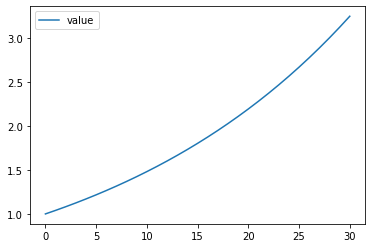

In [11]:
# We can put this in a pandas dataframe
import pandas as pd
fv_df = pd.DataFrame(fv_array, columns=['value'])
fv_df.plot()

## Saving for retirement
- Let's assume we want to save $10,000 every year
- Our initial balance is zero
- How much would our account grow over 30 years if we earn a rate of 5%?


In [165]:
r   = 0.05
n   = 30
pmt = 10000.0
pv  = 0.0

acct = pd.DataFrame(dtype=float,columns=['begbal','capgain','deposit','endbal'],index=np.arange(1,n+1))
acct.loc[1,'begbal'] = pv
acct.deposit = pmt
for t in acct.index:
    if t==1:
        acct.loc[t,'begbal'] = pv
    else:
        acct.loc[t,'begbal'] = acct.loc[t-1,'endbal']
    acct.loc[t,'capgain'] = acct.loc[t,'begbal']*r
    acct.loc[t,'endbal'] = acct.loc[t,'begbal'] + acct.loc[t,'capgain'] + acct.loc[t,'deposit']

pd.options.display.float_format = '${:,.2f}'.format
acct

begbal    capgain    deposit      endbal
1        $0.00      $0.00 $10,000.00  $10,000.00
2   $10,000.00    $500.00 $10,000.00  $20,500.00
3   $20,500.00  $1,025.00 $10,000.00  $31,525.00
4   $31,525.00  $1,576.25 $10,000.00  $43,101.25
5   $43,101.25  $2,155.06 $10,000.00  $55,256.31
6   $55,256.31  $2,762.82 $10,000.00  $68,019.13
7   $68,019.13  $3,400.96 $10,000.00  $81,420.08
8   $81,420.08  $4,071.00 $10,000.00  $95,491.09
9   $95,491.09  $4,774.55 $10,000.00 $110,265.64
10 $110,265.64  $5,513.28 $10,000.00 $125,778.93
11 $125,778.93  $6,288.95 $10,000.00 $142,067.87
12 $142,067.87  $7,103.39 $10,000.00 $159,171.27
13 $159,171.27  $7,958.56 $10,000.00 $177,129.83
14 $177,129.83  $8,856.49 $10,000.00 $195,986.32
15 $195,986.32  $9,799.32 $10,000.00 $215,785.64
16 $215,785.64 $10,789.28 $10,000.00 $236,574.92
17 $236,574.92 $11,828.75 $10,000.00 $258,403.66
18 $258,403.66 $12,920.18 $10,000.00 $281,323.85
19 $281,323.85 $14,066.19 $10,000.00 $305,390.04
20 $305,390.04 $15,269.50 $10,000.00 $330,659.54
21 $330,659.54 $16,532.98 $10,000.00 $357,192.52
22 $357,192.52 $17,859.63 $10,000.00 $385,052.14
23 $385,052.14 $19,252.61 $10,000.00 $414,304.75
24 $414,304.75 $20,715.24 $10,000.00 $445,019.99
25 $445,019.99 $22,251.00 $10,000.00 $477,270.99
26 $477,270.99 $23,863.55 $10,000.00 $511,134.54
27 $511,134.54 $25,556.73 $10,000.00 $546,691.26
28 $546,691.26 $27,334.56 $10,000.00 $584,025.83
29 $584,025.83 $29,201.29 $10,000.00 $623,227.12
30 $623,227.12 $31,161.36 $10,000.00 $664,388.48

In [166]:
# Of course, we could do this in one step using a financial function
npf.fv(r, n, -pmt, -pv)

664388.4750301335

In [167]:
# If we wanted to be able to withdraw $W=100,000 each year for 20 years, 
# how much do we need to save for the first 30 years

withdrawal = 100000.0


In [168]:
# First, we find how much we'd need to have saved as of t=30:

endbal30 = npf.pv(r,20,-withdrawal,0)
print(f'{endbal30:,.2f}')

1,246,221.03


In [169]:
# Second, we solve a PMT problem to determine the amount we need to save:

pmt = npf.pmt(r,30,pv,-endbal30)
print(f'{pmt:,.2f}')

18,757.41


In [170]:
#Let's set up a bank account to make sure we are getting a zero ending balance
r   = 0.05
n_saving   = 30
n_withdraw = 20
pv  = 0.0

acct = pd.DataFrame(dtype=float,columns=['begbal','capgain','deposit','withdraw','endbal'],index=np.arange(1,n_saving + n_withdraw + 1))
acct.loc[1,'begbal'] = pv
acct.deposit = np.where(acct.index <= n_saving, pmt,0)
acct.withdraw= np.where(acct.index > n_saving, -withdrawal,0)
for t in acct.index:
    if t==1:
        acct.loc[t,'begbal'] = pv
    else:
        acct.loc[t,'begbal'] = acct.loc[t-1,'endbal']
    acct.loc[t,'capgain'] = acct.loc[t,'begbal']*r
    acct.loc[t,'endbal']  = acct.loc[t,'begbal'] + acct.loc[t,'capgain'] + acct.loc[t,'deposit'] + acct.loc[t,'withdraw']
acct

begbal    capgain    deposit     withdraw        endbal
1          $0.00      $0.00 $18,757.41        $0.00    $18,757.41
2     $18,757.41    $937.87 $18,757.41        $0.00    $38,452.70
3     $38,452.70  $1,922.64 $18,757.41        $0.00    $59,132.75
4     $59,132.75  $2,956.64 $18,757.41        $0.00    $80,846.80
5     $80,846.80  $4,042.34 $18,757.41        $0.00   $103,646.56
6    $103,646.56  $5,182.33 $18,757.41        $0.00   $127,586.30
7    $127,586.30  $6,379.32 $18,757.41        $0.00   $152,723.03
8    $152,723.03  $7,636.15 $18,757.41        $0.00   $179,116.60
9    $179,116.60  $8,955.83 $18,757.41        $0.00   $206,829.84
10   $206,829.84 $10,341.49 $18,757.41        $0.00   $235,928.75
11   $235,928.75 $11,796.44 $18,757.41        $0.00   $266,482.60
12   $266,482.60 $13,324.13 $18,757.41        $0.00   $298,564.15
13   $298,564.15 $14,928.21 $18,757.41        $0.00   $332,249.77
14   $332,249.77 $16,612.49 $18,757.41        $0.00   $367,619.67
15   $367,619.67 $18,380.98 $18,757.41        $0.00   $404,758.07
16   $404,758.07 $20,237.90 $18,757.41        $0.00   $443,753.39
17   $443,753.39 $22,187.67 $18,757.41        $0.00   $484,698.48
18   $484,698.48 $24,234.92 $18,757.41        $0.00   $527,690.81
19   $527,690.81 $26,384.54 $18,757.41        $0.00   $572,832.77
20   $572,832.77 $28,641.64 $18,757.41        $0.00   $620,231.82
21   $620,231.82 $31,011.59 $18,757.41        $0.00   $670,000.83
22   $670,000.83 $33,500.04 $18,757.41        $0.00   $722,258.29
23   $722,258.29 $36,112.91 $18,757.41        $0.00   $777,128.62
24   $777,128.62 $38,856.43 $18,757.41        $0.00   $834,742.46
25   $834,742.46 $41,737.12 $18,757.41        $0.00   $895,237.00
26   $895,237.00 $44,761.85 $18,757.41        $0.00   $958,756.26
27   $958,756.26 $47,937.81 $18,757.41        $0.00 $1,025,451.49
28 $1,025,451.49 $51,272.57 $18,757.41        $0.00 $1,095,481.48
29 $1,095,481.48 $54,774.07 $18,757.41        $0.00 $1,169,012.97
30 $1,169,012.97 $58,450.65 $18,757.41        $0.00 $1,246,221.03
31 $1,246,221.03 $62,311.05      $0.00 $-100,000.00 $1,208,532.09
32 $1,208,532.09 $60,426.60      $0.00 $-100,000.00 $1,168,958.69
33 $1,168,958.69 $58,447.93      $0.00 $-100,000.00 $1,127,406.62
34 $1,127,406.62 $56,370.33      $0.00 $-100,000.00 $1,083,776.96
35 $1,083,776.96 $54,188.85      $0.00 $-100,000.00 $1,037,965.80
36 $1,037,965.80 $51,898.29      $0.00 $-100,000.00   $989,864.09
37   $989,864.09 $49,493.20      $0.00 $-100,000.00   $939,357.30
38   $939,357.30 $46,967.86      $0.00 $-100,000.00   $886,325.16
39   $886,325.16 $44,316.26      $0.00 $-100,000.00   $830,641.42
40   $830,641.42 $41,532.07      $0.00 $-100,000.00   $772,173.49
41   $772,173.49 $38,608.67      $0.00 $-100,000.00   $710,782.17
42   $710,782.17 $35,539.11      $0.00 $-100,000.00   $646,321.28
43   $646,321.28 $32,316.06      $0.00 $-100,000.00   $578,637.34
44   $578,637.34 $28,931.87      $0.00 $-100,000.00   $507,569.21
45   $507,569.21 $25,378.46      $0.00 $-100,000.00   $432,947.67
46   $432,947.67 $21,647.38      $0.00 $-100,000.00   $354,595.05
47   $354,595.05 $17,729.75      $0.00 $-100,000.00   $272,324.80
48   $272,324.80 $13,616.24      $0.00 $-100,000.00   $185,941.04
49   $185,941.04  $9,297.05      $0.00 $-100,000.00    $95,238.10
50    $95,238.10  $4,761.90      $0.00 $-100,000.00        $-0.00